In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pybnesian as pbn
from util_draw import *
# from util_metrics import *
from util_syntethic import *
import time 

### SIMULATE DATA
Atienza ref: \
https://github.com/davenza/SPBN-Experiments/blob/master/synthetic/test_hc_spbn.py

In [10]:
config = get_config(1)
print(len(config['arcs']), 'arcs for key 2')
ref_model0 = pbn.SemiparametricBN(**config)
draw_model(ref_model0,'synthetic1', save=False)

config = get_config(2)
ref_model0 = pbn.SemiparametricBN(**config)
draw_model(ref_model0,'synthetic2', save=False)
print(len(config['arcs']), 'arcs for key 13')


config = get_config(3)
ref_model0 = pbn.SemiparametricBN(**config)
draw_model(ref_model0,'synthetic3', save=False)
print(len(config['arcs']), 'arcs for key 3')

config = get_config(4)
ref_model0 = pbn.SemiparametricBN(**config)
draw_model(ref_model0,'synthetic4', save=False)
print(len(config['arcs']), 'arcs for key 4')



10 arcs for key 2


21 arcs for key 13
7 arcs for key 3
14 arcs for key 4


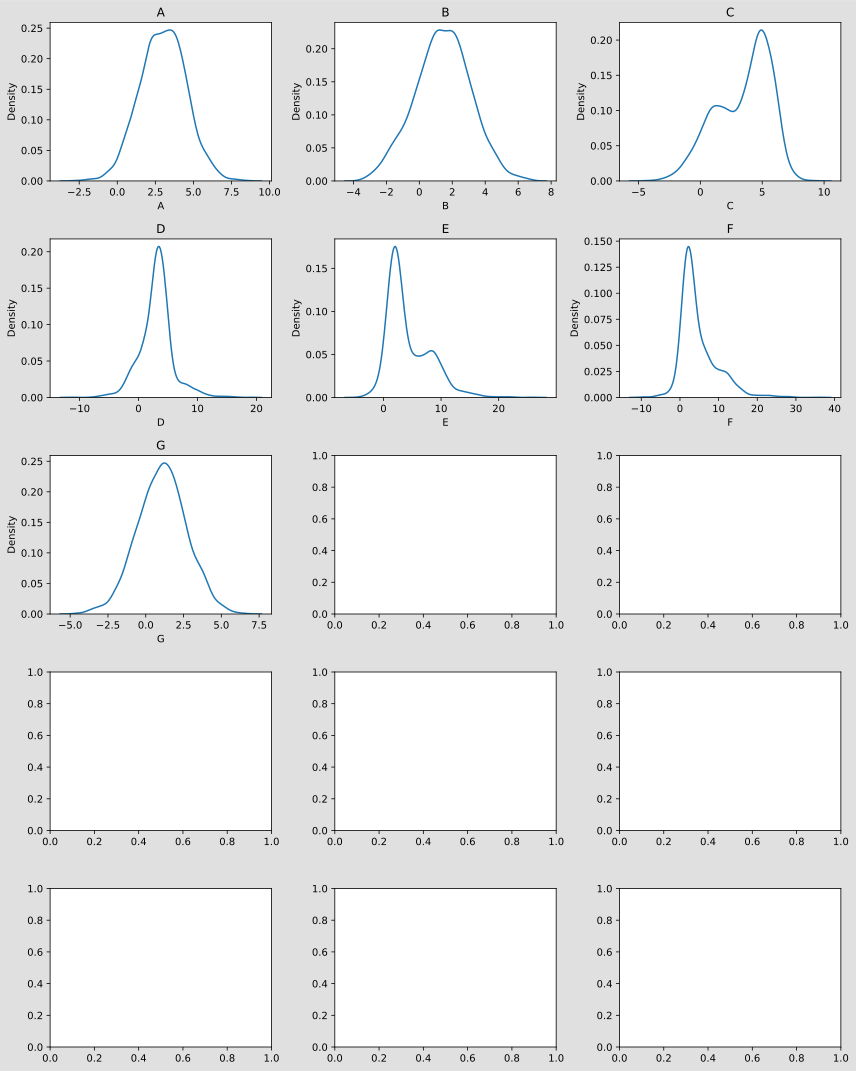

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pybnesian as pbn
from util_draw import *
from util_metrics import *
#from util_syntethic import *
import time 

key = 1
data = generate_data(key,2000,seed=20)
config = get_config(key)


nodemap = {node: i for i, node in enumerate(data.columns.values)}

fig, axs = plt.subplots(5, 3, figsize=(12, 15))
for i, col in enumerate(data.columns):
    sns.kdeplot(data[col], ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(col)


plt.tight_layout()
plt.show()

ref_model0 = pbn.SemiparametricBN(nodes = list(data.columns.values), **config)
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# plot_model(ref_model0,ax)

In [2]:
ntrain, ntest = 2**12, 2**11 
print(ntrain, ntest)

# good synthetic data: 2 

# print(np.sum(logl_ref))


4096 2048


In [13]:
executions = []
for i in range(10):
    
    train = generate_data(key, ntrain, seed=i)
    test = generate_data(key, ntest, seed=255+i)
    hc = pbn.GreedyHillClimbing()
    vl = pbn.ValidatedLikelihood(train, k=5)
    pool = pbn.OperatorPool([pbn.ArcOperatorSet(), pbn.ChangeNodeTypeSet()])

    ref_model0.fit(train)
    logl_ref = ref_model0.logl(test)

    emptynet = pbn.SemiparametricBN(list(data.columns.values))
    start = time.time()
    model = hc.estimate(pool, vl, emptynet, patience = 3, max_indegree = 3)
    end = time.time()
    train_time = end - start
    
    model.fit(train)
    
    start = time.time()
    logl_pred = model.logl(test)
    end = time.time()
    test_time = end - start

    print((np.sum(logl_pred), np.sum(logl_ref)))


    hmd = hamming_distance(model.arcs(), config['arcs'], nodemap)
    shd = structural_hamming_distance(model.arcs(), config['arcs'])

    rmse = np.sqrt(np.mean((logl_pred - logl_ref)**2))
    relative_err = np.mean(np.abs(logl_pred - logl_ref) / np.abs(logl_ref))*100

    executions.append(pd.DataFrame({'HMD': hmd, 'SHD': shd, 'rmse':rmse, 'relative_err':relative_err,'train time':train_time, 'test_time': test_time}, index=[i]))
    print(executions[-1])

    missingarcs = [arcs for arcs in model.arcs() if arcs not in config['arcs']]
    
    print(missingarcs)
df_spbn = pd.concat(executions)
df_spbn

(np.float64(-28068.748766963574), np.float64(-28068.74876696357))
   HMD  SHD          rmse  relative_err  train time  test_time
0  0.0    0  2.271214e-15  1.287211e-14   14.964616     0.6922
[]
(np.float64(-28083.88678464374), np.float64(-28089.9344944194))
   HMD  SHD     rmse  relative_err  train time  test_time
1  1.0    2  0.59875      1.807363   14.286067   0.713297
[('B', 'A'), ('E', 'G')]
(np.float64(-27905.48894227034), np.float64(-27951.999567239487))
   HMD  SHD      rmse  relative_err  train time  test_time
2  0.0    0  0.581741      1.657981   13.903992   0.690966
[]
(np.float64(-27967.842525081272), np.float64(-27945.57031386362))
   HMD  SHD      rmse  relative_err  train time  test_time
3  1.0    2  0.501229      1.565081   16.152116   0.726063
[('B', 'A'), ('E', 'G')]
(np.float64(-28036.199030246087), np.float64(-28056.09333906039))
   HMD  SHD      rmse  relative_err  train time  test_time
4  0.0    0  0.520662       1.77047   13.707215   0.696317
[]
(np.float64(-2800

,HMD,SHD,rmse,relative_err,train time,test_time
0,0.0,0,2.271214e-15,1.287211e-14,14.964616,0.692200
1,1.0,2,5.987496e-01,1.807363e+00,14.286067,0.713297
2,0.0,0,5.817413e-01,1.657981e+00,13.903992,0.690966
3,1.0,2,5.012294e-01,1.565081e+00,16.152116,0.726063
4,0.0,0,5.206616e-01,1.770470e+00,13.707215,0.696317
5,0.0,0,4.110068e-01,1.631658e+00,14.770917,0.684332
6,0.0,0,9.723988e-01,1.704687e+00,14.155419,0.690651
7,0.0,1,8.971172e-01,1.680937e+00,14.133960,0.694014
8,1.0,2,6.685240e-01,1.671514e+00,14.249800,0.692456
9,2.0,3,5.952909e-01,1.555266e+00,16.499577,0.723271


In [14]:
mean_spbn = df_spbn.mean().to_frame().T
mean_spbn

,HMD,SHD,rmse,relative_err,train time,test_time
0,0.5,1.0,0.574672,1.504496,14.682368,0.700357


In [11]:
grid = 80
linear = False
fft = False
fit_fbn = dict(grid=grid, linear=linear, use_fft=fft)
executions = []
for i in range(10):
    train = generate_data(key, ntrain, seed=i)
    test = generate_data(key, ntest, seed=255+i)
    
    hc = pbn.GreedyHillClimbing()
    # vl = pbn.CVLikelihoodFT(train, k=10,
    #                     grid_size=grid, linear_binning=False, use_fft=False)

    vl = pbn.ValidatedLikelihoodFT(train, k=5,
                                   grid_size=grid, linear_binning=linear, use_fft=fft)

    pool = pbn.OperatorPool([pbn.ArcOperatorSet(), pbn.ChangeNodeTypeSet()])
    
    ref_model0.fit(train)
    logl_ref = ref_model0.logl(test)
    
    emptynet = pbn.FourierNetwork(list(data.columns.values))
    start = time.time()
    model = hc.estimate(pool, vl, emptynet, patience = 3, max_indegree = 3)
    end = time.time()
    train_time = end - start
    
    model.fit(train,**fit_fbn)
    
    start = time.time()
    logl_pred = model.logl(test)
    end = time.time()
    test_time = end - start

    print((np.sum(logl_pred), np.sum(logl_ref)))
    
    hmd = hamming_distance(model.arcs(), config['arcs'], nodemap)
    shd = structural_hamming_distance(model.arcs(), config['arcs'])
    rmse = np.sqrt(np.mean((logl_pred - logl_ref)**2))
    relative_err = np.mean(np.abs(logl_pred - logl_ref) / np.abs(logl_ref))*100
    executions.append(pd.DataFrame({'HMD': hmd, 'SHD': shd, 'rmse':rmse, 'relative_err':relative_err,'train time':train_time, 'test_time': test_time}, index=[i]))

    print(executions[-1])
    
    missingarcs = [arcs for arcs in model.arcs() if arcs not in config['arcs']]
    print(missingarcs)

df_fsbn = pd.concat(executions)
df_fsbn

(np.float64(-28084.616035426938), np.float64(-28068.74876696357))
   HMD  SHD     rmse  relative_err  train time  test_time
0  1.0    2  0.06451      0.224162    13.52503   0.677604
[('D', 'G'), ('B', 'A')]
(np.float64(-28098.184956460485), np.float64(-28089.9344944194))
   HMD  SHD      rmse  relative_err  train time  test_time
1  0.0    0  0.568525      1.780013   13.009119   0.688155
[]
(np.float64(-27930.036779972223), np.float64(-27951.999567239487))
   HMD  SHD     rmse  relative_err  train time  test_time
2  0.0    0  0.57244      1.657551   13.093117   0.666565
[]
(np.float64(-27995.31405288075), np.float64(-27945.57031386362))
   HMD  SHD      rmse  relative_err  train time  test_time
3  1.0    1  0.517973      1.574969    13.04767   0.657814
[('E', 'G')]
(np.float64(-28059.662145247712), np.float64(-28056.09333906039))
   HMD  SHD      rmse  relative_err  train time  test_time
4  0.0    1  0.516276      1.770738   12.022964   0.672838
[('B', 'A')]
(np.float64(-28021.478414863

,HMD,SHD,rmse,relative_err,train time,test_time
0,1.0,2,0.064510,0.224162,13.525030,0.677604
1,0.0,0,0.568525,1.780013,13.009119,0.688155
2,0.0,0,0.572440,1.657551,13.093117,0.666565
3,1.0,1,0.517973,1.574969,13.047670,0.657814
4,0.0,1,0.516276,1.770738,12.022964,0.672838
5,1.0,2,0.422794,1.649684,12.086121,0.716803
6,0.0,1,0.973273,1.695251,13.566909,0.678642
7,0.0,0,0.887814,1.667447,12.078805,0.686608
8,0.0,0,0.677530,1.666914,12.032823,0.695479
9,0.0,1,0.561823,1.523014,13.703475,0.668922


In [10]:
mean_fsbn = df_fsbn.mean().to_frame().T
mean_fsbn

,HMD,SHD,rmse,relative_err,train time,test_time
0,0.3,0.9,0.582676,1.543077,11.782845,0.558481


In [12]:
mean_fsbn = df_fsbn.mean().to_frame().T
mean_fsbn

,HMD,SHD,rmse,relative_err,train time,test_time
0,0.3,0.8,0.576296,1.520974,12.816603,0.680943


### NASA BENCHMARKS
https://www.nasa.gov/intelligent-systems-division/discovery-and-systems-health/pcoe/pcoe-data-set-repository/

#### CMAPSS 

In [ ]:
def read_data(path):
  df = pd.read_csv(path, delimiter=' ', header=None)
  # check null ratios of each columns
  rc = df.isnull().sum(axis=0)/len(df)
  print(rc[rc!=0.])
  return df

names = ['unit', 'time',
         'altitude', 'mach', 'TRA',
         'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr',
         'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

df_train1 = read_data('data/aingura/public_datasets/train_FD001.txt')
df_train2 = read_data('data/aingura/public_datasets/train_FD002.txt')
df_train3 = read_data('data/aingura/public_datasets/train_FD003.txt')
df_train4 = read_data('data/aingura/public_datasets/train_FD004.txt')
# remove full of null columns
df_train1.drop([26, 27], axis=1, inplace=True)
df_train1.columns = names
df_train2.drop([26, 27], axis=1, inplace=True)
df_train2.columns = names
df_train3.drop([26, 27], axis=1, inplace=True)
df_train3.columns = names
df_train4.drop([26, 27], axis=1, inplace=True)
df_train4.columns = names


In [ ]:
df_trains_sealvl = pd.concat([df_train1, df_train3],axis=0).reset_index(drop=True)
df_trains_sealvl.to_csv('data/aingura/public_datasets/nasa_repos/6_cmapss_trains_sealvl.csv', index=False)
df_trains_sealvl

In [ ]:
df_trains_six = pd.concat([df_train2, df_train4],axis=0).reset_index(drop=True)
df_trains_six.to_csv('data/aingura/public_datasets/nasa_repos/6_cmapss_trains_six.csv', index=False)
df_trains_six

In [ ]:
df_test1 = read_data('data/aingura/public_datasets/test_FD001.txt')
df_test2 = read_data('data/aingura/public_datasets/test_FD002.txt')
df_test3 = read_data('data/aingura/public_datasets/test_FD003.txt')
df_test4 = read_data('data/aingura/public_datasets/test_FD004.txt')

# remove full of null columns
df_test1.drop([26, 27], axis=1, inplace=True)
df_test1.columns = names
df_test2.drop([26, 27], axis=1, inplace=True)
df_test2.columns = names
df_test3.drop([26, 27], axis=1, inplace=True)
df_test3.columns = names
df_test4.drop([26, 27], axis=1, inplace=True)
df_test4.columns = names

In [ ]:
df_test_sealvl = pd.concat([df_test1, df_test3], axis=0).reset_index(drop=True)
df_test_sealvl.to_csv('data/aingura/public_datasets/nasa_repos/6_cmapss_tests_sealvl.csv', index=False)
df_test_sealvl

In [ ]:
df_test_six = pd.concat([df_test2, df_test4], axis=0).reset_index(drop=True)
df_test_six.to_csv('data/aingura/public_datasets/nasa_repos/6_cmapss_tests_six.csv', index=False)
df_test_six

In [ ]:
for n in names:
    print(n, df_test_six[n].nunique(), df_test_sealvl[n].nunique())
    print(n, df_trains_six[n].nunique(), df_trains_sealvl[n].nunique())



#### IGBT data 

In [ ]:
from scipy.io import loadmat

# Replace 'your_file.mat' with the path to your MATLAB file
mat_data = loadmat('data/aingura/IGBTAgingData_04022009/IGBTAgingData_04022009/Data/Thermal Overstress Aging with DC at gate/20080429T135531.mat')

mat_data.keys()



In [130]:
names = ['GATE_VOLTAGE', 'COLLECTOR_VOLTAGE', 'HEAT_SINK_TEMP', 'GATE_CURRENT', 'COLLECTOR_CURRENT', 'TIME', 'PACKAGE_TEMP']

vars = {}
for n in names:
    vars[n] = mat_data[n].flatten()

df = pd.DataFrame(vars)
df.to_csv('data/aingura/nasa_repos/8.igbt-the_thermal_overstress_aging_with_dc_at_gate.csv', index=False)

#### milling

In [81]:
from scipy.io import loadmat
import pandas as pd


In [88]:
mat_data = loadmat('data/aingura/nasa_repos/3. Milling/mill.mat',simplify_cells=True)

mill = mat_data['mill']
pandas_df = []
for i in range(len(mill)):
    df = pd.DataFrame(mill[i])
    pandas_df.append(df)
pandas_df = pd.concat(pandas_df, axis=0)
pandas_df.to_csv('data/aingura/nasa_repos/3_mill.csv', index=False)


#### 16 stellite power simulation

In [ ]:
mat_data = loadmat('data/aingura/nasa_repos/16. Small Satellite Power Simulation Data Set/PK31.mat',simplify_cells=True)
mat_data.keys()

In [ ]:

data['step'][0]['comment']

In [ ]:
data = mat_data['data']
print(data.keys())

data['mode'][0].keys(), data['step'][0].keys()

In [ ]:
item = data['mode']
pandas_df = []
for i in range(len(item)):
    item_new = {k: v for k, v in item[i].items() if k != 'comment'}

    # print(item_new)
    try:
        df = pd.DataFrame(item_new)
    except:
        df = pd.DataFrame(item_new, index=[i])
    pandas_df.append(df)
pandas_df = pd.concat(pandas_df, axis=0)
# pandas_df.to_csv('data/aingura/nasa_repos/16_PK35_mode.csv', index=False)
print(pandas_df.info())
item = data['step']
pandas_df = []
for i in range(len(item)):
    item_new = {k: v for k, v in item[i].items() if k != 'comment'}

    # print(item_new)
    try:
        df = pd.DataFrame(item_new)
    except:
        df = pd.DataFrame(item_new, index=[i])
    pandas_df.append(df)
pandas_df = pd.concat(pandas_df, axis=0)
# pandas_df.to_csv('data/aingura/nasa_repos/16_PK35_step.csv', index=False)
pandas_df

### UCI REPOSITORY
https://archive.ics.uci.edu/datasets?FeatureTypes=Numerical&Python=true&skip=0&take=10&sort=desc&orderBy=NumHits&search=


In [9]:
from ucimlrepo import fetch_ucirepo 

savepath = 'data/aingura/uci_repos/'

In [ ]:
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 
  
X
# X.to_csv(savepath+'individual_household_electric_power_consumption.csv', index=False)

In [ ]:
individual_household_electric_power_consumption.metadata

In [21]:
# fetch dataset 
appliances_energy_prediction = fetch_ucirepo(id=374) 
  
# data (as pandas dataframes) 
X = appliances_energy_prediction.data.features 
y = appliances_energy_prediction.data.targets 

X
# X.to_csv(savepath+'appliances_energy_prediction.csv', index=False)

In [ ]:
appliances_energy_prediction.metadata

In [26]:
# fetch dataset 
magic_gamma_telescope = fetch_ucirepo(id=159) 
  
# data (as pandas dataframes) 
X = magic_gamma_telescope.data.features 
y = magic_gamma_telescope.data.targets 

X
# X.to_csv(savepath+'magic_gamma_telescope.csv', index=False)

In [ ]:
magic_gamma_telescope.metadata

In [37]:
# fetch dataset 
single_elder_home_monitoring_gas_and_position = fetch_ucirepo(id=799) 
  
# data (as pandas dataframes) 
X = single_elder_home_monitoring_gas_and_position.data.features 
y = single_elder_home_monitoring_gas_and_position.data.targets 

X
X.to_csv(savepath+'single_elder_home_monitoring_gas_and_position.csv', index=False)

In [ ]:
single_elder_home_monitoring_gas_and_position.metadata

In [41]:
# fetch dataset 
htru2 = fetch_ucirepo(id=372) 
  
# data (as pandas dataframes) 
X = htru2.data.features 
y = htru2.data.targets 

X
# X.to_csv(savepath+'htru2.csv', index=False)

In [ ]:
htru2.metadata

In [46]:
# fetch dataset 
occupancy_detection = fetch_ucirepo(id=357) 
  
# data (as pandas dataframes) 
X = occupancy_detection.data.features 
y = occupancy_detection.data.target

X
X.to_csv(savepath+'occupancy_detection.csv', index=False)

In [ ]:
occupancy_detection.metadata